In [8]:
library(tidyverse)
library(ggplot2)
library(RColorBrewer)
library(gplots)
library(pheatmap)


In [9]:
# Make simple table for analysis
Total.table <- read.csv("01.DESeq_results/total_rh_og_gene.csv")
Total.simple.table <- Total.table %>%
  dplyr::select(Gene, starts_with("log2"), starts_with("padj"))


In [10]:
#set the threshold
Th.lfc2 <- 1
Th.padj <- 0.05

# Filter the table
rh30up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_30min > Th.lfc2, padj_RHAM_30min < Th.padj)
rh90up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_90min > Th.lfc2, padj_RHAM_90min < Th.padj)
og30up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_30min > Th.lfc2, padj_OGs_30min < Th.padj)
og90up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_90min > Th.lfc2, padj_OGs_90min < Th.padj)
rh30down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_30min < -(Th.lfc2), padj_RHAM_30min < Th.padj)
rh90down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_90min < -(Th.lfc2), padj_RHAM_90min < Th.padj)
og30down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_30min < -(Th.lfc2), padj_OGs_30min < Th.padj)
og90down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_90min < -(Th.lfc2), padj_OGs_90min < Th.padj)

# List for DEG
rh30deg <- c(rh30up$Gene, rh30down$Gene)
length(rh30deg)
rh90deg <- c(rh90up$Gene, rh90down$Gene)
length(rh90deg)
rh.deg <- c(rh30deg, rh90deg)
rh.deg <- unique(rh.deg)
length(rh.deg)

og30deg <- c(og30up$Gene, og30down$Gene)
length(og30deg)
og90deg <- c(og90up$Gene, og90down$Gene)
length(og90deg)
og.deg <- c(og30deg, og90deg)
og.deg <- unique(og.deg)
length(og.deg)

ult.list <- c(og.deg, rh.deg)
length(ult.list)
ult.list <- unique(ult.list)
length(ult.list)


[1] 1407

[1] 1543

[1] 2323

[1] 1322

[1] 2124

[1] 2469

[1] 4792

[1] 3657

In [12]:
# generate HM table
HMtable <- Total.simple.table %>%
  dplyr::filter(Gene %in% ult.list) %>%
  dplyr::select(Gene, starts_with("l")) %>%
  dplyr::filter(!str_detect(Gene, "ATMG")) %>%
  dplyr::filter(!str_detect(Gene, "ATCG"))
row.names(HMtable) <- HMtable$Gene
HMtable$Gene <- NULL
HMtable <- na.omit(HMtable)
HMtable <- as.matrix(HMtable)
colnames(HMtable) <- c("Rham 30", "Rham 90", "OGs 30", "OGs 90")

# set colors
myheatcolors3 <- colorRampPalette(brewer.pal(9, "PRGn"))(100)


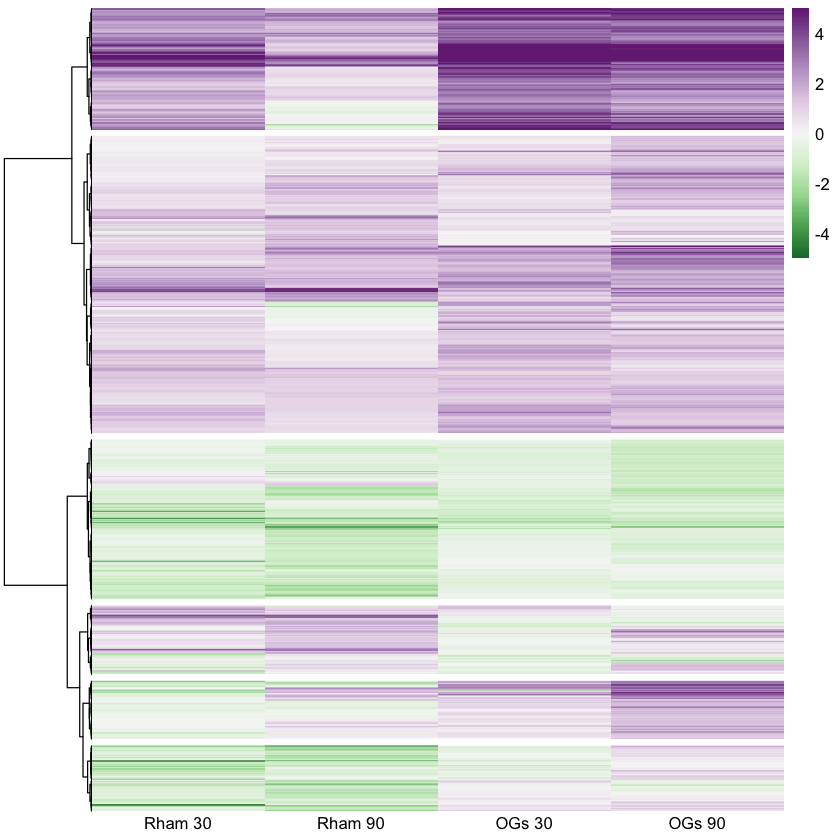

In [13]:
pheatmap(
  HMtable,
  color = rev(myheatcolors3),  # Color
  breaks = seq(-5, 5, length.out = 101),  # Break min max
  border_color = "grey60",
  cellwidth = NA,
  cellheight = NA,
  scale = "none",  # "none", "row", "column"
  cluster_rows = TRUE,
  cluster_cols = FALSE,
  clustering_distance_rows = "canberra",  # Clustering distance method
  clustering_method = "ward.D",  # Clustering method
  cutree_rows = 6,
  legend = TRUE,
  show_rownames = FALSE,
  angle_col = "0")

pdf 
  3

[1] "pdf file has been exported at 04.Heatmap"


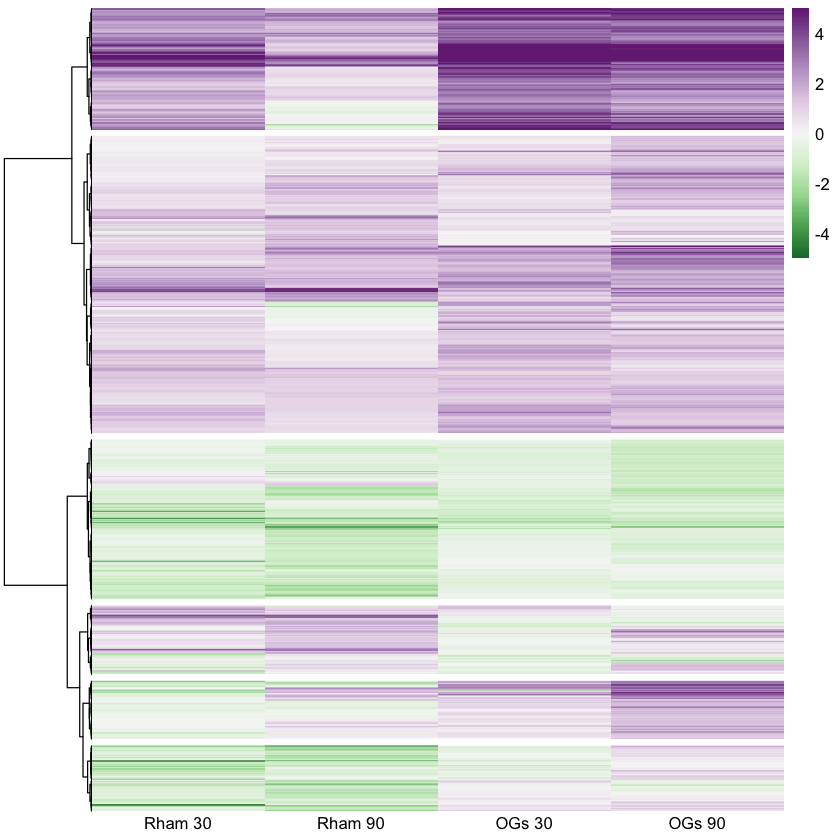

In [14]:
# Create the pdf file and generate the heatmap
heatmap_canberra_ward.D <- "04.Heatmap/heatmap_canberra_ward.D.pdf"
pdf(heatmap_canberra_ward.D, width = 6, height = 4.5)
heatmap <- pheatmap(
  HMtable,
  color = rev(myheatcolors3),  # Color
  breaks = seq(-5, 5, length.out = 101),  # Break min max
  border_color = "grey60",
  cellwidth = NA,
  cellheight = NA,
  scale = "none",  # "none", "row", "column"
  cluster_rows = TRUE,
  cluster_cols = FALSE,
  clustering_distance_rows = "canberra",  # Clustering distance method
  clustering_method = "ward.D",  # Clustering method
  cutree_rows = 6,
  legend = TRUE,
  show_rownames = FALSE,
  angle_col = "0")
dev.off()

print("pdf file has been exported at 04.Heatmap")

pdf 
  3

[1] "tiff file has been exported at 04.Heatmap"


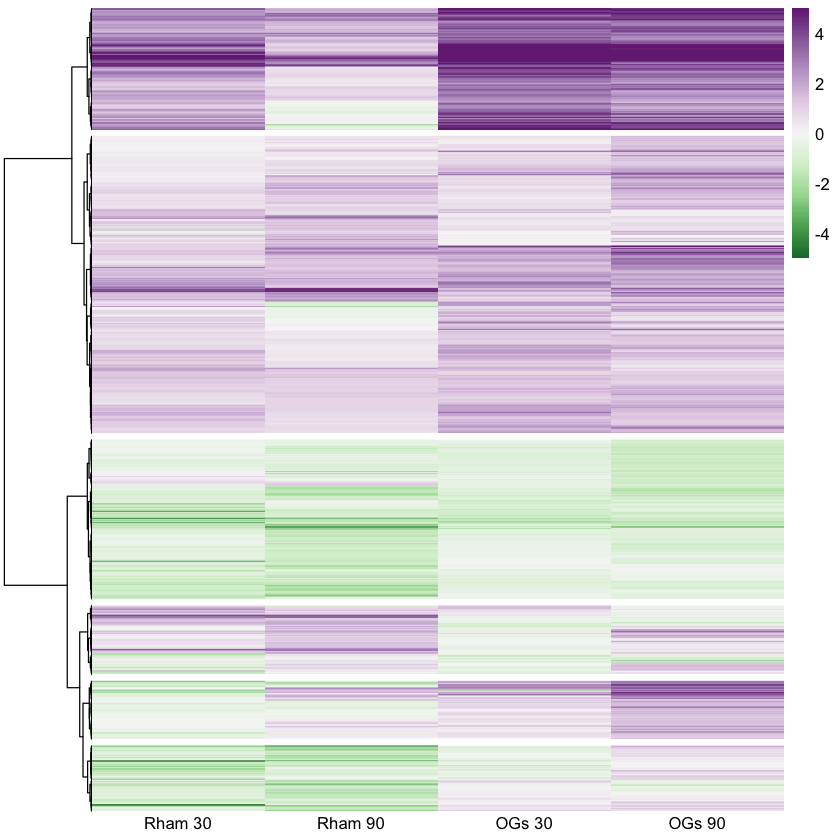

In [15]:
# Create the TIFF file and generate the heatmap
heatmap_canberra_ward.D_tiff <- "04.Heatmap/heatmap_canberra_ward.D.tiff"
tiff(heatmap_canberra_ward.D_tiff, width = 2000, height = 2500, res = 600) # Adjust width and height as needed
heatmap <- pheatmap(
  HMtable,
  color = rev(myheatcolors3),  # Color
  breaks = seq(-5, 5, length.out = 101),  # Break min max
  border_color = "grey60",
  cellwidth = NA,
  cellheight = NA,
  scale = "none",  # "none", "row", "column"
  cluster_rows = TRUE,
  cluster_cols = FALSE,
  clustering_distance_rows = "canberra",  # Clustering distance method
  clustering_method = "ward.D",  # Clustering method
  cutree_rows = 6,
  legend = TRUE,
  show_rownames = FALSE,
  angle_col = "0")
dev.off()
print("tiff file has been exported at 04.Heatmap")